In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# robust data path resolver for notebook runs
p = Path('data/processed/flipkart_laptops_clean.csv')
if not p.exists():
    repo = Path.cwd()
    for _ in range(4):
        cand = repo / 'data/processed/flipkart_laptops_clean.csv'
        if cand.exists():
            p = cand
            break
        repo = repo.parent
    else:
        raise FileNotFoundError('data/processed/flipkart_laptops_clean.csv not found')

print('Loading data from', p)
df = pd.read_csv(p)

df.head()


Loading data from c:\Users\sumit\Documents\Data Science Projects\ecommerce-price-prediction\data\processed\flipkart_laptops_clean.csv


,product_name,price,rating,reviews_count,source,query,page,name_len,has_pro,has_ultra,reviews_bucket
0,MOTOROLA Motobook 60 Full Metal OLED (i5 14th ...,52990,4.4200,254,Flipkart,laptop,1,105,0,0,medium
1,ASUS Vivobook Go 15 (2025) with Office 2024 + ...,39990,4.3369,33,Flipkart,laptop,1,105,0,0,very_low
2,ASUS Vivobook Go 15 AMD Ryzen 3 Quad Core 7320...,33990,4.3100,108,Flipkart,laptop,1,105,0,0,low
3,ASUS Vivobook 15 (2025) with Office 2024 + M36...,45990,4.5740,3,Flipkart,laptop,1,105,0,0,very_low
4,MOTOROLA Motobook 60 Full Metal OLED (i7 14th ...,76990,4.4730,81,Flipkart,laptop,1,105,0,0,low


  Dataset contains **157 rows** and **11 columns**.
- Key features: `product_name`, `price`, `rating`, `reviews_count`, `reviews_bucket`, `name_len`,   `has_pro`, `has_ultra`.
- **No missing values** detected → dataset is clean and ready for modeling.



In [25]:
# Quick data diagnostics and missingness
print('\nData types and non-null counts:')
print(df.info())

missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_tbl = pd.concat([missing, missing_pct], axis=1)
missing_tbl.columns = ['missing_count', 'missing_pct']
missing_tbl[missing_tbl['missing_count']>0]



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    157 non-null    object 
 1   price           157 non-null    int64  
 2   rating          157 non-null    float64
 3   reviews_count   157 non-null    int64  
 4   source          157 non-null    object 
 5   query           157 non-null    object 
 6   page            157 non-null    int64  
 7   name_len        157 non-null    int64  
 8   has_pro         157 non-null    int64  
 9   has_ultra       157 non-null    int64  
 10  reviews_bucket  157 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 13.6+ KB
None


,missing_count,missing_pct


Histogram shows a **right‑skewed distribution**.
- Most laptops priced between **₹30,000–₹50,000**.
- Premium models extend above ₹100,000.
- *Insight:* Mid‑range laptops dominate Flipkart’s offerings.  
- *Modeling note:* Apply **log transformation** on price to reduce skew.

---


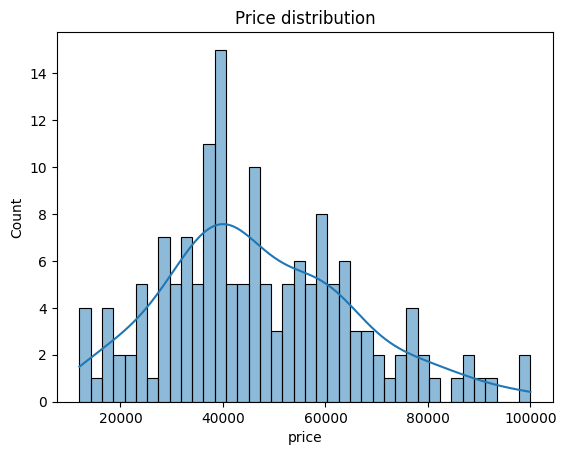

In [26]:
# Price distribution
sns.histplot(df["price"], bins=40, kde=True)
plt.title("Price distribution")
plt.show()

- Scatterplot shows **higher‑priced laptops generally maintain high ratings (4.2–4.5)**.
- Relationship is **weak and noisy**, not strictly linear.
- *Insight:* Ratings alone don’t explain pricing — brand/specs matter too.  
- *Modeling note:* Consider **non‑linear models** (Random Forest, XGBoost).

---


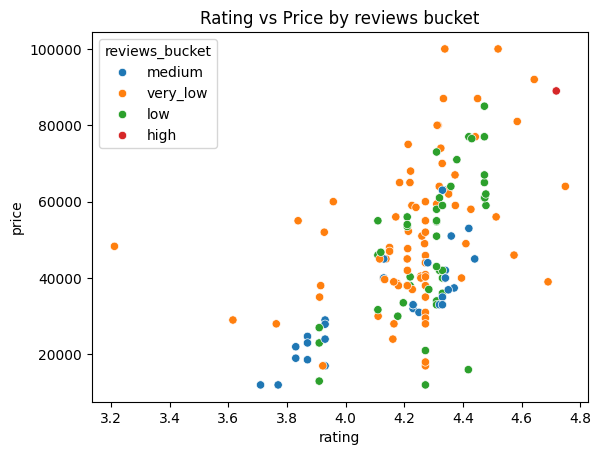

In [27]:
# Rating vs price
sns.scatterplot(data=df, x="rating", y="price", hue="reviews_bucket")
plt.title("Rating vs Price by reviews bucket")
plt.show()

- Products with **more reviews** tend to have **stable ratings**.
- `reviews_count` is **negatively correlated with price (~‑0.21)**.
- *Insight:* Affordable laptops attract more buyers and reviews.  
- *Business note:* Premium laptops have fewer but consistently positive reviews.

---


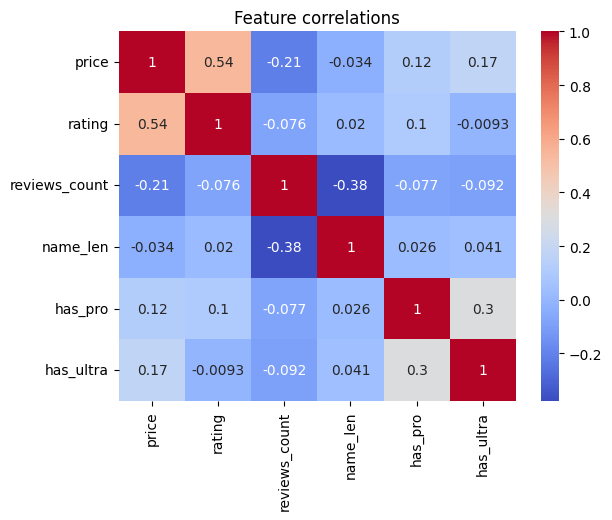

In [28]:
# Correlations
num_cols = ["price", "rating", "reviews_count", "name_len", "has_pro", "has_ultra"]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature correlations")
plt.show()



- `rating` shows the **strongest positive correlation with price (~0.54)**.
- `reviews_count` negatively correlated with price.
- Flags like `has_pro` and `has_ultra` provide categorical signals.
- *Insight:* Ratings drive perceived value, reviews reflect affordability.  
- *Modeling note:* Include engineered features (`name_len`, `reviews_bucket`) for better accuracy.

---


**Conclusion**

- Flipkart’s laptop market is **mid‑range heavy (₹30k–₹50k)**.
- Premium laptops → high ratings, fewer reviews.
- Ratings correlate positively with price; reviews correlate negatively.
- Feature engineering + log transformation will improve predictive modeling.
